# Data Science Project

Importando las bilbiotecas empleadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

Leyendo el archivo del conjunto de datos filtrando las dos columnas a usar:
- Nationality
- Overall

In [2]:
dataframe = (pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)).filter(["Age", "Nationality","Club","Value", "Wage",
                                "Preferred Foot", "Position", "Joined", "Contract Valid Until", "Height", "Weight"])

Visualización del marco de datos importados

In [3]:
dataframe

,Nationality,Overall
ID,,
158023,Argentina,94
20801,Portugal,94
190871,Brazil,92
193080,Spain,91
192985,Belgium,91
...,...,...
238813,England,47
243165,Sweden,47
241638,England,47


Comprobación si existe algún dato nulo en el marco de datos

In [4]:
pd.DataFrame(dataframe.isnull().sum(), columns=['Datos nulos'])

,Datos nulos
Nationality,0
Overall,0


Comprobación del tipo de dato de cada columna del marco de datos

In [5]:
pd.DataFrame(dataframe.dtypes, columns=['Tipo de dato'])

,Tipo de dato
Nationality,object
Overall,int64


Convertimos los valores del conjunto de datos en una matriz de Numpy

In [6]:
dataset = dataframe.values

Se crea un conjunto a partir de los nombres de los países con su frecuencia de jugadores

In [7]:
countrySet = [x for x in np.unique(dataset[:,0], return_counts=True)]

In [10]:
#Creación de variables usadas para el marco de datos normalizedDataset
minMaxCount = MinMaxScaler().fit_transform(countrySet[1].reshape(-1,1)).flat[:]

mean = [statistics.geometric_mean(dataframe[dataframe["Nationality"]==pais]["Overall"])for pais in countrySet[0]]
minMaxMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]


In [11]:
normalizedDataset = pd.DataFrame(data={'Nationality':countrySet[0], 'Count': countrySet[1], "Mean": mean,
            'MinMaxCount': minMaxCount, 'MinMaxMean': minMaxMean})

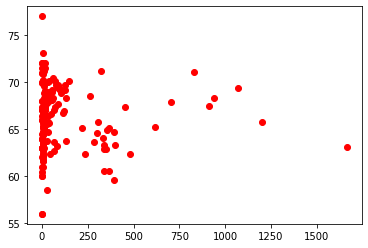

In [27]:
plt.scatter(normalizedDataset["Count"].values, normalizedDataset["Mean"].values, color='r')
plt.show()

In [12]:
normalizedDataset = normalizedDataset.assign(GeometricMean=[statistics.geometric_mean([data[0],data[1]])
                for data in normalizedDataset[['MinMaxCount', 'MinMaxMean']].values+.0000001])

normalizedDataset = normalizedDataset.assign(Suma=[(data[0] + data[1])
                for data in normalizedDataset[['MinMaxCount', 'MinMaxMean']].values])

Datos normalizados

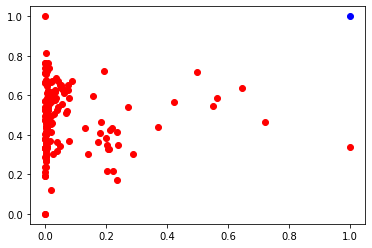

In [39]:
plt.scatter(normalizedDataset["MinMaxCount"].values, normalizedDataset["MinMaxMean"].values, color='r')
plt.scatter(1, 1, color='b')
plt.show()

Primeros lugares de acuerdo con GeometricMean

In [42]:
normalizedDataset.sort_values('GeometricMean',ascending=False).head(n=30)

,Nationality,Count,Mean,MinMaxCount,MinMaxMean,GeometricMean,Suma
139,Spain,1072,69.399849,0.644792,0.638088,0.641432,1.282880
20,Brazil,827,71.032826,0.497291,0.715849,0.596645,1.213140
46,England,1662,63.067219,1.000000,0.336534,0.580116,1.336534
59,Germany,1198,65.758510,0.720650,0.464691,0.578688,1.185341
6,Argentina,937,68.294150,0.563516,0.585436,0.574371,1.148952
55,France,914,67.438628,0.549669,0.544697,0.547177,1.094365
78,Italy,702,67.842462,0.422035,0.563927,0.487849,0.985962
31,Colombia,618,65.263305,0.371463,0.441110,0.404791,0.812573
108,Netherlands,453,67.383009,0.272125,0.542048,0.384064,0.814173
123,Portugal,322,71.137432,0.193257,0.720830,0.373237,0.914087


Últimos lugares de acuerdo con GeometricMean

In [43]:
normalizedDataset.sort_values('GeometricMean',ascending=True).head(n=30)

,Nationality,Count,Mean,MinMaxCount,MinMaxMean,GeometricMean,Suma
74,Indonesia,1,56.000000,0.000000,0.000000,1.000000e-07,0.000000
19,Botswana,1,56.000000,0.000000,0.000000,1.000000e-07,0.000000
138,South Sudan,1,60.000000,0.000000,0.190476,1.380131e-04,0.190476
14,Belize,1,60.000000,0.000000,0.190476,1.380131e-04,0.190476
98,Malta,1,61.000000,0.000000,0.238095,1.543034e-04,0.238095
3,Andorra,1,62.000000,0.000000,0.285714,1.690309e-04,0.285714
125,Qatar,1,63.000000,0.000000,0.333333,1.825742e-04,0.333333
124,Puerto Rico,1,63.000000,0.000000,0.333333,1.825742e-04,0.333333
129,Rwanda,1,63.000000,0.000000,0.333333,1.825742e-04,0.333333
82,Jordan,1,63.000000,0.000000,0.333333,1.825742e-04,0.333333


Comparando Mean con GeometricMean

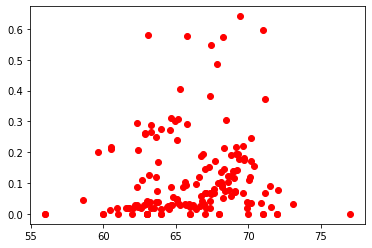

In [47]:
plt.scatter(normalizedDataset["Mean"].values, normalizedDataset["GeometricMean"].values, color='r')
plt.show()

Comparando Count con GeometricMean

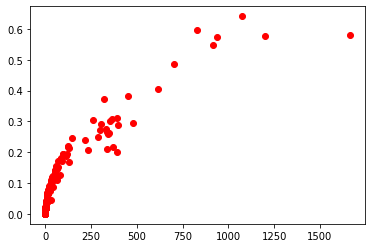

In [46]:
plt.scatter(normalizedDataset["Count"].values, normalizedDataset["GeometricMean"].values, color='r')
plt.show()